<a href="https://colab.research.google.com/github/FatmaAlZhraaMarzouk/Numerical-Alogrithms/blob/main/Single_Variable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Single Variable Linear Regression
### Use BFGS Method to optimize a LR model for the data provided in the attached file.
### Use Multivariable gradient descent to solve the same problem.
### Evaluate Gradient descent solution and BFGS solution using r2_score.
### Plot the following curves:
#### - Cost vs. iterations.
#### - Cost vs. each parameter.
### Find the solution using sklearn.linear_model.LinearRegression model.
### Compare the results from Gradient descent, BFGS, and sklearn models. Write your conclusion in brief.

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from numpy import linalg as LA
import timeit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file1=open("/content/drive/MyDrive/algorithm/RegData.csv")
Data=np.loadtxt(file1,delimiter=',')

#### Explore your data

In [4]:
Data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [5]:
X=Data[:,0]

In [6]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [7]:
Y=Data[:,1]

In [8]:
Y 

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [9]:
X.shape

(13,)

In [10]:
Y.shape

(13,)

#### Plot the original data (scatter plot of X,y)

Text(0.5, 1.0, 'Scatter plot for data')

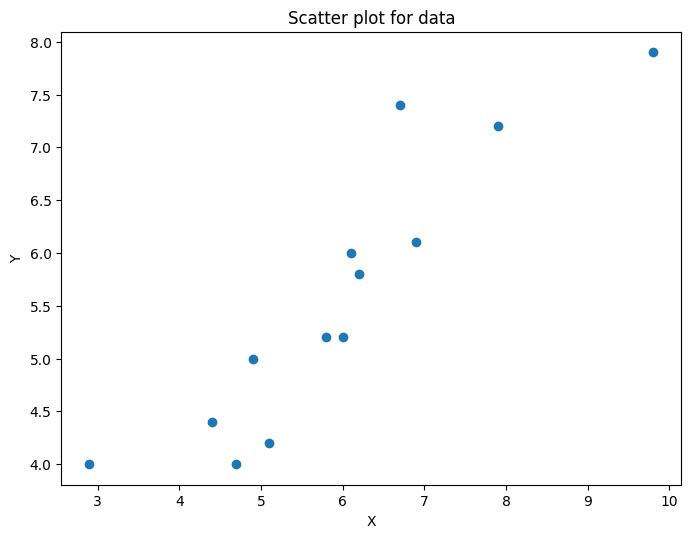

In [11]:
figure(figsize=(8, 6), dpi=100)
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot for data")

## Initialize parameters (theta_0 & theta_1)

In [12]:
theta=np.array([[0.0],[0.0]])
theta

array([[0.],
       [0.]])

### Predict the output h(x)= theta_0 + theta_1 * x.

In [13]:
def clac_hypothesis(x,theta):
    return theta[0][0]+np.multiply(theta[1][0],x)

# BFGS Method to optimize a LR model

In [375]:
def DF(dfx1,dfy1,T):
    df = np.array([[dfx1(T[0][0],T[1][0])],
               [dfy1(T[0][0],T[1][0])]])
    return df

def BK(dfx,dfy,X1,X0,Bk0):
    Deltaa = X1 - X0
    Yk =  DF(dfx,dfy,X1) - DF(dfx,dfy,X0)
    BK = Bk0 + ((Yk@Yk.T) / (Yk.T @ Deltaa ) ) -((Bk0@Deltaa@Deltaa.T@Bk0)/(Deltaa.T@Bk0@Deltaa))
    return BK

def BFGS(f,dfx,dfy,Bk0,XK_1,XK,alpha=0.03,epsilon = 0.001):
    theta_0 = []
    theta_1 = []
    Cost = []
    
    for i in range(100):
        Cost.append(f(XK))
        theta_0.append(XK[0][0])
        theta_1.append(XK[1][0])
        Bk1 = BK(dfx,dfy,XK,XK_1,Bk0)
        XK1 = XK -  alpha * (np.linalg.inv(Bk1) @ DF(dfx,dfy,XK))     
        Bk0 = Bk1
        if abs(f(XK1)-f(XK)) < epsilon:
            break
        XK_1 = XK
        XK = XK1
    
    print("Found solution after {} iterations.".format(i))
    print(XK1)
    return XK1,Cost,theta_0,theta_1

In [376]:
f1 = lambda theta : np.sum(((theta[0]+np.multiply(theta[1],X))-Y)**2)/(2*len(X))
dftheta_0 = lambda theta_0,theta_1 : np.sum((theta_0+np.multiply(theta_1,X)-Y))/(1*len(X))
dftheta_1 = lambda theta_0,theta_1 : np.sum((theta_0+np.multiply(theta_1,X)-Y)*X)/(1*len(X))
XK_1 = np.array([[1],[1]])
XK = np.array([[0],[0]])

In [378]:
start = timeit.default_timer()
theta_final,cost1,thetas0,thetas1 = BFGS(f1,dftheta_0,dftheta_1,np.eye(2),XK_1,XK,1)
stop = timeit.default_timer()
TimeBFGS = stop - start

Found solution after 3 iterations.
[[1.43411077]
 [0.69452919]]


In [379]:
h_X=clac_hypothesis(X,theta_final)

In [380]:
h_X

array([3.4482455 , 6.08745623, 4.83730388, 6.92089147, 8.240497  ,
       6.22636227, 5.67073878, 5.74019164, 5.60128593, 4.97620959,
       4.69839785, 4.49003929, 5.46238022])

Text(0.5, 1.0, 'Plot Predicted output with data points using BFGS Method')

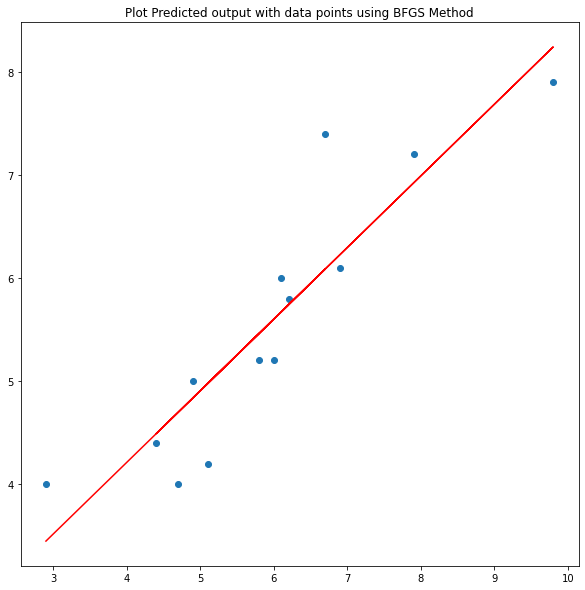

In [381]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(X, h_X, 'r', label='Prediction')
ax.scatter(X, Y,label='Traning Data')
ax.set_title("Plot Predicted output with data points using BFGS Method")

### Cost vs. iterations

Text(0.5, 1.0, 'plot Cost function with iterations')

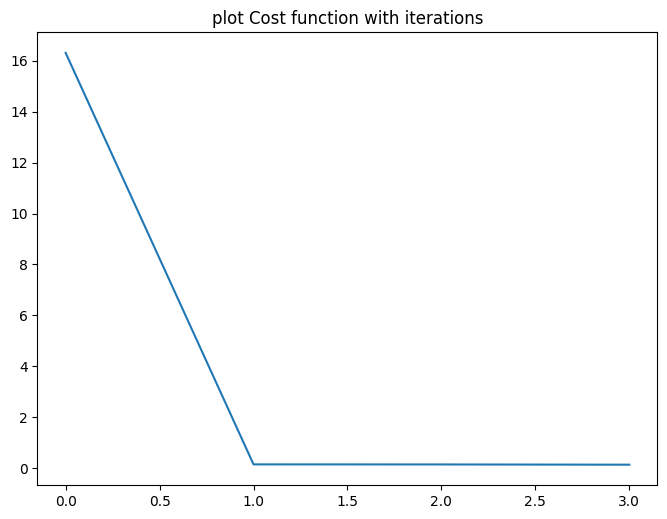

In [382]:
figure(figsize=(8, 6), dpi=100)
plt.plot(cost1)
plt.title("plot Cost function with iterations")

### Cost vs. each parameter

Text(0.5, 1.0, 'plot Cost function with theta 0')

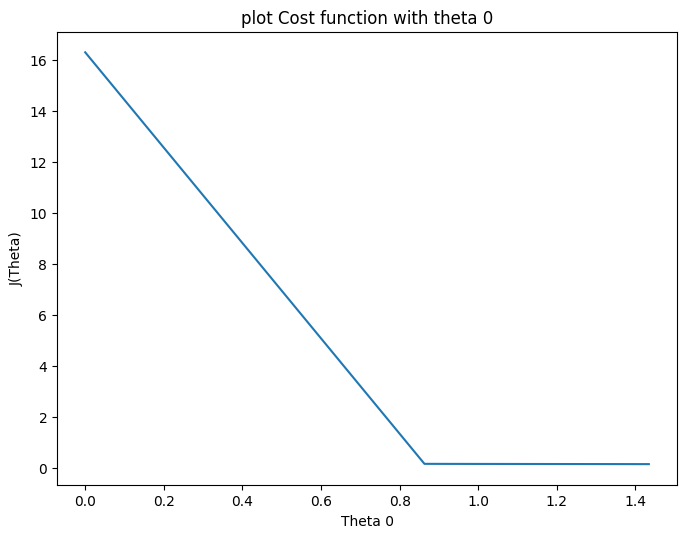

In [383]:
figure(figsize=(8, 6), dpi=100)
plt.plot(thetas0,cost1)
plt.xlabel("Theta 0")
plt.ylabel("J(Theta)")
plt.title("plot Cost function with theta 0")

Text(0.5, 1.0, 'plot Cost function with theta 1')

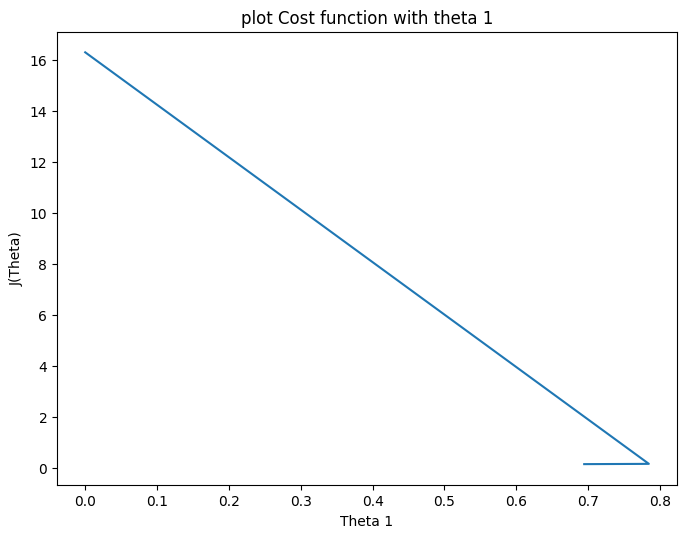

In [384]:
figure(figsize=(8, 6), dpi=100)
plt.plot(thetas1,cost1)
plt.xlabel("Theta 1")
plt.ylabel("J(Theta)")
plt.title("plot Cost function with theta 1")

### Use R2 score to evaluate LR equation output

In [385]:
from sklearn.metrics import r2_score
BFGSScore = r2_score(Y, h_X)

In [386]:
print("Score Using BFGS = ",BFGSScore)
print("Run Time for BFGS Method = ",TimeBFGS)

Score Using BFGS =  0.8213156778363777
Run Time for BFGS Method =  0.002905252998971264


# Use Multivariable gradient descent 

In [387]:
x = X.reshape(-1,1)
y = Y.reshape(-1,1)

In [388]:
ones=np.array(np.ones((13,1)))
x_data = np.hstack((ones,x))

In [392]:
def Gradientdesent(x,y,alpha = 0.03,epsilon = 0.001):
    m=len(x)
    theta=np.array([[0.0],[0.0]])
    theta_0=[0.0]
    theta_1=[0.0]
    J_arr=[]
    GD=np.array([[0.0],[0.0]])
    for i in range(1000):
        error =x.dot(theta) - y
        GD = (x.T.dot(error))*(alpha/m)
        if LA.norm(GD) < epsilon:
          break
        J=(error.T.dot(error))/(2*m)
        J_arr.append(J[0][0])
        if J_arr[i-1]-J_arr[i] < epsilon and i!=0:
            break
        theta=theta-(alpha)*GD
        theta_0.append(theta[0][0])
        theta_1.append(theta[1][0])
    return GD,J_arr,theta_0,theta_1,theta

In [393]:
start = timeit.default_timer()
GD,cost,theta_0,theta_1,theta=Gradientdesent(x_data,y)
stop = timeit.default_timer()
TimeGD = stop - start

In [394]:
h=theta[0]*x_data[:,0]+theta[1]*x_data[:,1]

Text(0.5, 1.0, 'Plot Predicted output with data points using BFGS Method')

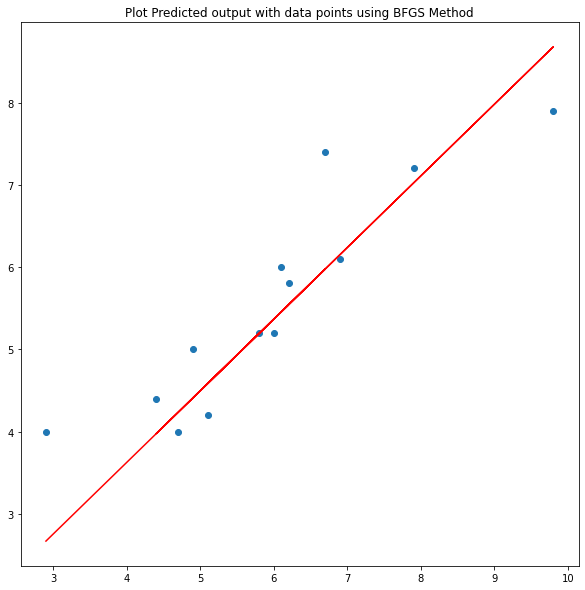

In [395]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(X, h, 'r', label='Prediction')
ax.scatter(X, Y,label='Traning Data')
ax.set_title("Plot Predicted output with data points using BFGS Method")

### Cost vs. iterations

Text(0.5, 1.0, 'plot Cost function with iterations')

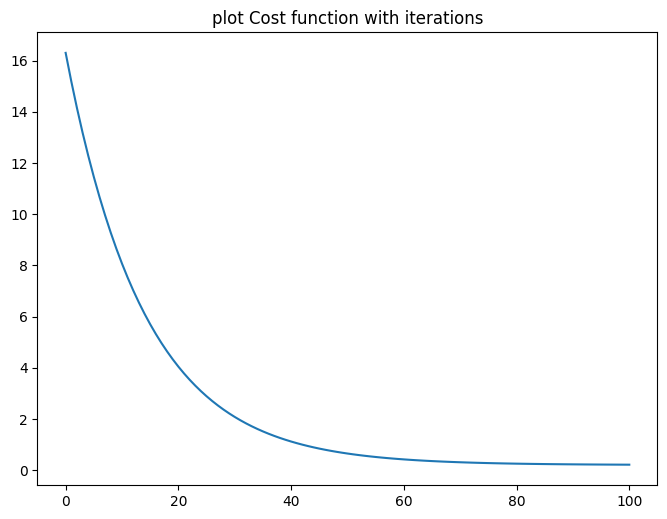

In [396]:
figure(figsize=(8, 6), dpi=100)
plt.plot(cost)
plt.title("plot Cost function with iterations")

### Cost vs. each parameter

Text(0.5, 1.0, 'plot Cost function with theta 0')

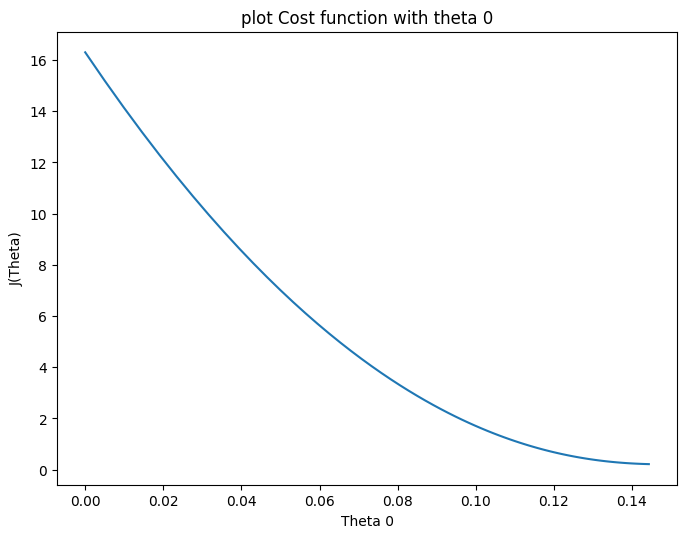

In [397]:
figure(figsize=(8, 6), dpi=100)
plt.plot(theta_0,cost)
plt.xlabel("Theta 0")
plt.ylabel("J(Theta)")
plt.title("plot Cost function with theta 0")

Text(0.5, 1.0, 'plot Cost function with theta 1')

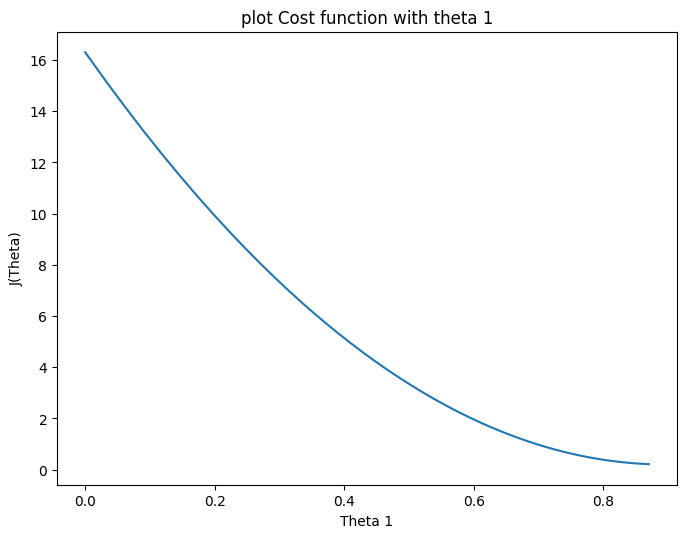

In [398]:
figure(figsize=(8, 6), dpi=100)
plt.plot(theta_1,cost)
plt.xlabel("Theta 1")
plt.ylabel("J(Theta)")
plt.title("plot Cost function with theta 1")

### Use R2 score to evaluate LR equation output

In [399]:
from sklearn.metrics import r2_score
GDScore = r2_score(Y, h)

In [400]:
print("Score Using Gradien Descent = ",GDScore)
print("Run Time for GD Method = ",TimeGD)

Score Using Gradien Descent =  0.7319011584956701
Run Time for GD Method =  0.021399193999968702


#  Solution using sklearn.linear_model.LinearRegression model.

In [401]:
from sklearn.linear_model import LinearRegression
start = timeit.default_timer()
reg = LinearRegression().fit(x, y)
stop = timeit.default_timer()
TimeSklearn = stop - start

In [402]:
SKScore = reg.score(x, y)

In [403]:
print("Score Using SKlearn = ",SKScore)
print("Run Time for Sklearn= ",TimeSklearn)

Score Using SKlearn =  0.8213156778363777
Run Time for Sklearn=  0.00248809199911193


# Compare the results

In [404]:
from prettytable import PrettyTable
CompareTable = PrettyTable([" Method", "Time consumed" , "Score"])
CompareTable.add_row([" BFGS",TimeBFGS ,BFGSScore ])
CompareTable.add_row([" Multi GD",TimeGD,GDScore ])
CompareTable.add_row([" SKlearn",TimeSklearn,SKScore ])

In [405]:
print(CompareTable)

+-----------+----------------------+--------------------+
|   Method  |    Time consumed     |       Score        |
+-----------+----------------------+--------------------+
|    BFGS   | 0.002905252998971264 | 0.8213156778363777 |
|  Multi GD | 0.021399193999968702 | 0.7319011584956701 |
|   SKlearn | 0.00248809199911193  | 0.8213156778363777 |
+-----------+----------------------+--------------------+


> From the above table `BFGS` Score similar to `Sklearn` Score 
As Explanied below Sklearn uses `Newton algorithm` to optmize OSL.

> Time consumed for Sklearn and BFGS aslo is almost the same unlike `Multivarient Gradient Descent` It takes more epoches to reach minmum to optmize cost function.

> The `Gradient Descent` function depends solely on the parameter of the derivative of the function, hence categorizing this method as a first order optimization method. Although this method is a good way to optimize a given cost function, as we work with local and limited information at each step linearly, this leads to certain limitations to it.So we look towards a more efficient method requiring and analyzing more information and parameters second order optimization method like `BFGS`.


> To summarize, GD method are easy to implement (but somewhat hard to tune).
BFGS methods are a good option for low dimensional models like our problem  and GD for moderately high dimensional models. 






## Sklearn uses ORDINARY LEAST SQUARES, derived from Gauss-Markov theorem.
We define hyperplane as:
> 0_bGlJ2AQmQu_6qm7W.jpg

In the equation, the betas (βs) are the parameters that OLS estimates. Epsilon (ε) is the random error.

So, we can completely define our hyperplane by finding the values of β0,β1, … , βk. The values of β tell us an important thing. If our model predicts a high value of |βi|, it means our model has given the feature Xi a high importance in deciding the predicted value. βi = 0 means that our model completely ignores the feature Xi.

We can convert the above equation into matrix form and write it as:

> 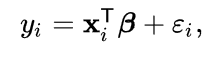

where xi is a column vector of the ith observations of all the explanatory variables; β is a k×1 vector of unknown parameters.


> 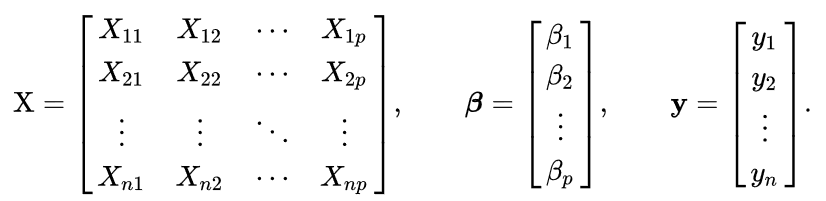

In mathematics, the given problem has a unique solution when solved using Normal Equation,


> 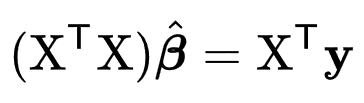

This finally leads us to:


> 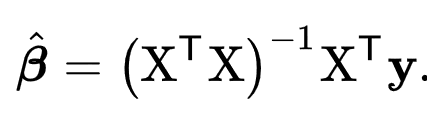
The coefficient vector

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

At Sklearn using Newton algorithm to optmize OSL which is a root finding method that uses linear approximation. In particular, we guess a solution  of the equation , compute the linear approximation of  at  and then find the intercept of the linear approximation.

Refernces: 
[Implementation of the Newton algorithm Sklearn](https://github.com/scikit-learn/scikit-learn/blob/6cb2c52375a812ff509c00f4eed1da232e7a8932/sklearn/utils/optimize.py)

















